## Lab1: Review of R
### Basic arithmetic operations

In [ ]:
7 + 4 
7 - 4
7 / 2 
7 * 2 

[1] 11

[1] 3

[1] 3.5

[1] 14

### Basic arithmetic function

In [ ]:
log(1)
exp(-4)
sqrt(4)

[1] 0

[1] 0.01831564

[1] 2

### Vectors
Vectors are the simplest R data objects.
* Create a vector with "combine":c()

In [ ]:
x1 <- c(1, 3, 7:12)

And to see the result, you can either:

In [ ]:
print(x1)

[1]  1  3  7  8  9 10 11 12


or

In [ ]:
# Including in () also print the vector
(x1)

[1]  1  3  7  8  9 10 11 12

* Get a subset of a vector: my_vector[i] to get the ith element

In [ ]:
days <- c("Sun", "Mon", "Tue","Wed","Thurs","Fri", "Sat")
(today <- days[3])

[1] "Tue"

* You can also access the element of a vector using logical operations:

In [ ]:
x <- seq(1,10)
x[(x%%2) == 0] # get the even numbers from a vector

[1]  2  4  6  8 10

* Calculations with vectors: max(x), min(x), range(x), length(x), sum(x), mean(x), prod(x) (product of the elements in x), sd(x) (standard deviation), var(x) (variance), sort(x)

In [ ]:
my_vector <- c(27, 25, 29, 26)
mean(my_vector)

[1] 26.75

* Case of missing values: NA (not available) and NaN (not a number)

In [ ]:
(NA_vector <- c(NA))

[1] NA

In [ ]:
(NaN_vector <- c(NaN)) # Example: 1/0, log(0), etc.

[1] NaN

### Matrices

* Matrices in R are objects of the same type. A matrix can be created with a function: matrix(data, nrow, ncol, byrow, dimnames)

In [ ]:
# Elements are arranged sequentially by column.
(N <- matrix(seq(1,20), nrow = 4, byrow = FALSE))

1,5,9,13,17
2,6,10,14,18
3,7,11,15,19
4,8,12,16,20


* Check and convert: is.matrix(), as.matrix()

* Transpose a matrix: t()

* Dimensions of a matrix: ncol(), nrow(), dim()

* Get a subset of a matrix: my_data[row, col]

In [ ]:
N[2,4] # the element in 2nd row and 4th column.

[1] 14

In [ ]:
N[2, ] # the 2nd row.

[1]  2  6 10 14 18

In [ ]:
(N[1:2, 3:5]) # Subset 1:2 row 3:5 column

9,13,17
10,14,18


* Calculations with numeric matrices: rowSums(), colSums(), rowMeans(), colMeans(), apply()

* Matrix product: `%*%`

### **Data-frames**

*   A data frame is a table or a 2D array-like structure, whose:
Columns can store data of different types e.g. numeric, character etc.
*   Each column must contain the same number of data items.
*   The column names should be non-empty.
*   The row names should be unique.

In [ ]:
# Create the data frame.
employees <- data.frame(
row.names = c("E1","E2","E3","E4","E5"),
name = c("Rick","Dan","Michelle","Ryan","Gary"),
salary = c(623.3,515.2,611.0,729.0,843.25),
start_date = as.Date(c("2012-01-01","2013-09-23","2014-11-15","2014-05-11","2015-03-27")),stringsAsFactors = FALSE )
# Print the data frame.
print(employees)

       name salary start_date
E1     Rick 623.30 2012-01-01
E2      Dan 515.20 2013-09-23
E3 Michelle 611.00 2014-11-15
E4     Ryan 729.00 2014-05-11
E5     Gary 843.25 2015-03-27


## Graphics in R

### Basic graphs

R is very convenient to generate figures. Here are some basic graphics functions in R.

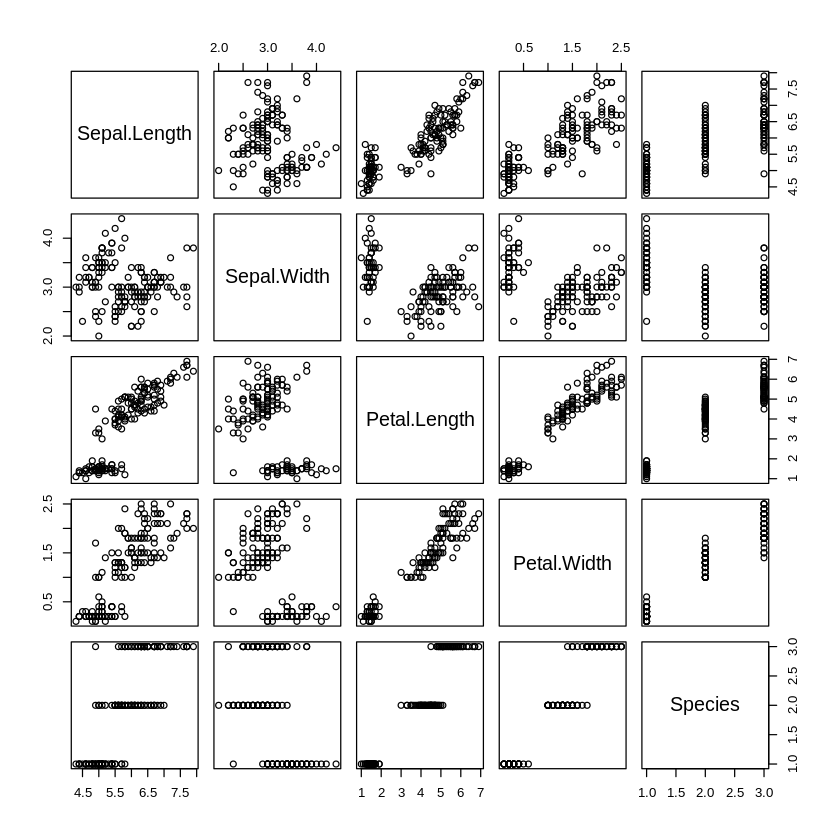

In [ ]:
data(iris)
pairs(iris) # pairwise scatterplot

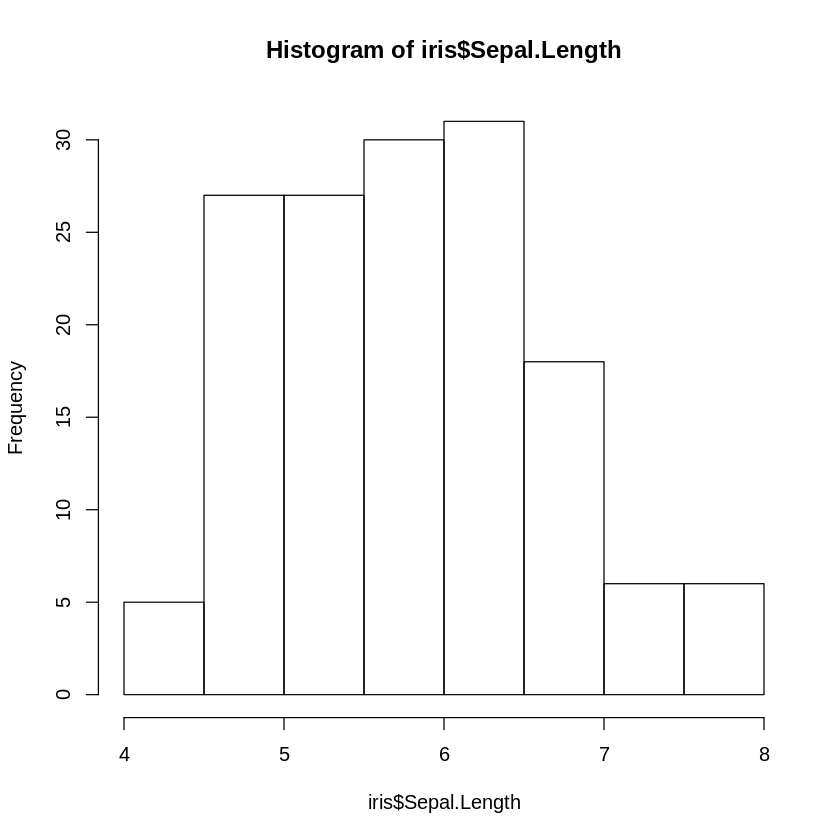

In [ ]:
hist(iris$Sepal.Length)

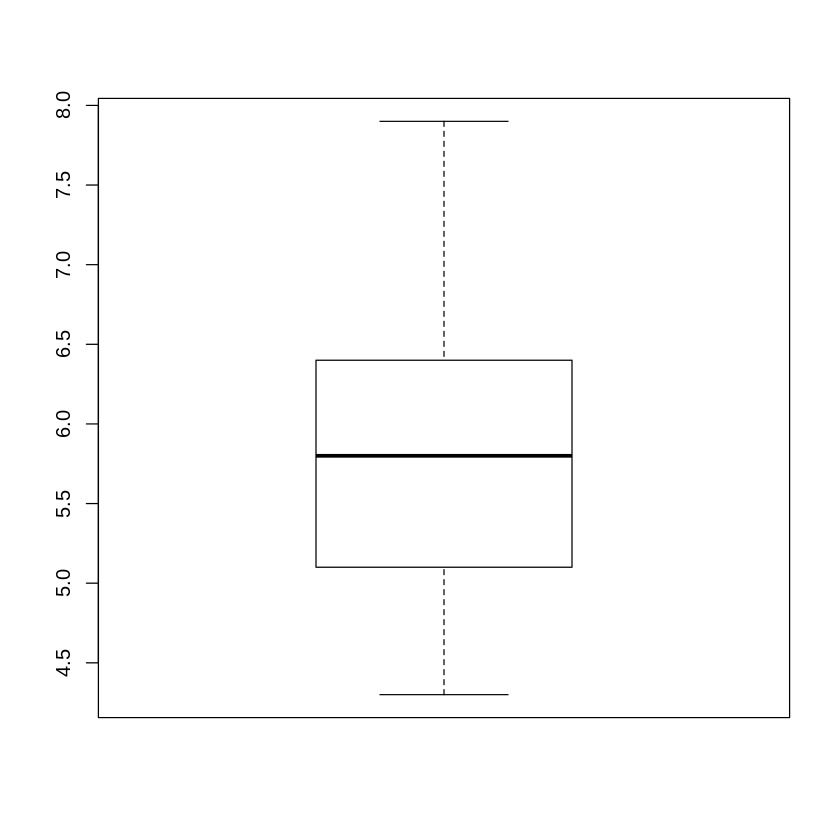

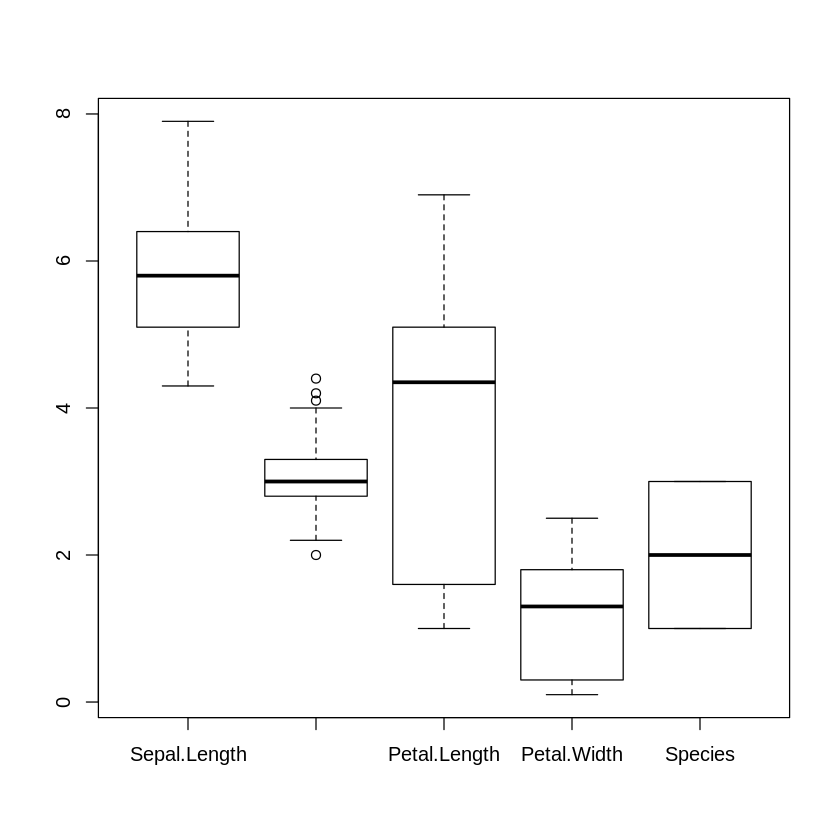

In [ ]:
boxplot(iris$Sepal.Length)
boxplot(iris)

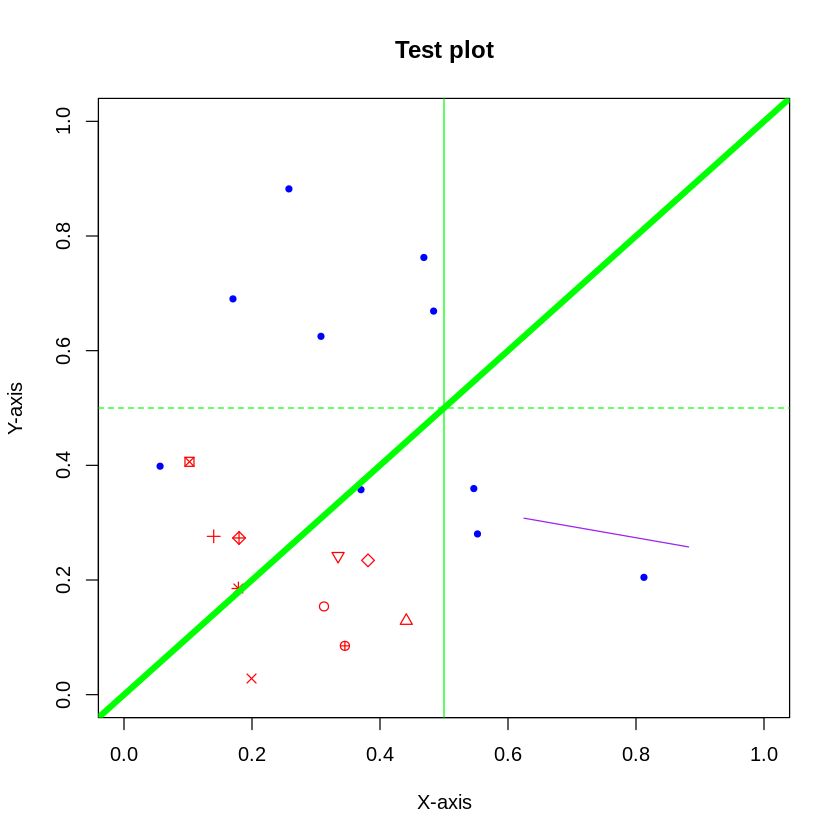

In [ ]:
# use plot to get the tendency between two data sets
set.seed(100)
x <- runif(10)
y <- runif(10)
plot(x,y,type="p",main="Test plot",col="blue",
 xlim=c(0,1),ylim=c(0,1),xlab="X-axis",
 ylab="Y-axis",pch=20)
points(y/2,x/2,col="red",pch=1:10)
lines(y[1:2],x[1:2],col="purple")
abline(v=0.5,col="green")
abline(h=0.5,col="green",lty=2) # lty: the line type
abline(a=0,b=1,col="green",lwd=5) # a:intercept, b:slope, lwd: the line width

### **ggplot2** package

The library ggplot2 offers a plotting system with substantial capabilities and nicer graphics than the base plotting functions.


In [ ]:
# install.packages("ggplot2") 
# if you don't have this package, you need to install it.
library(ggplot2)

or

In [ ]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## **Buliding block of ggplot2 graphical objects**

*   data
*   aesthetic mapping
*   geometric objects
*   statistical transformaons
*   facets
*   scales
*   coordinate system
*   positioning adjustment

**Aesthetic Mapping**: something you can see, for example, position, color, fill, shape, linetype, size and so on. Aesthetic mappings are set with the aes() function.

**Geometic Objects**: the actual marks we put on a plot, for example, points(geom_point), lines(geom_line), histograms(geom_histogram).

```
ggplot(data = <DATA>) +
GEOM_FUNCTION(
mapping = aes(<mappings>),
stat = <statistic transformation>,
position = <position options>,
color = <fixed color>,
<other arguments>) +
FACET_FUNCTION(<facet options>) +
SCALE_FUNCTION(<scale options>) +
theme(<theme elements>)
```

#### Examples:

In [ ]:
# here is data contained in tidyverse library
dsmall <- sample_n(diamonds, 1000)
summary(dsmall)

     carat               cut      color      clarity        depth      
 Min.   :0.2100   Fair     : 29   D:116   SI1    :258   Min.   :55.30  
 1st Qu.:0.4000   Good     : 76   E:187   VS2    :209   1st Qu.:61.10  
 Median :0.7100   Very Good:241   F:182   SI2    :176   Median :61.90  
 Mean   :0.8233   Premium  :243   G:205   VS1    :151   Mean   :61.77  
 3rd Qu.:1.1025   Ideal    :411   H:162   VVS2   :101   3rd Qu.:62.50  
 Max.   :2.7400                   I: 90   VVS1   : 67   Max.   :68.40  
                                  J: 58   (Other): 38                  
     table           price               x               y        
 Min.   :52.00   Min.   :  354.0   Min.   :3.820   Min.   :3.780  
 1st Qu.:56.00   1st Qu.:  976.2   1st Qu.:4.720   1st Qu.:4.720  
 Median :57.00   Median : 2483.5   Median :5.710   Median :5.740  
 Mean   :57.35   Mean   : 4214.1   Mean   :5.782   Mean   :5.783  
 3rd Qu.:59.00   3rd Qu.: 6073.8   3rd Qu.:6.652   3rd Qu.:6.650  
 Max.   :66.00   Max. 

A plot must have at least one geometric object. 

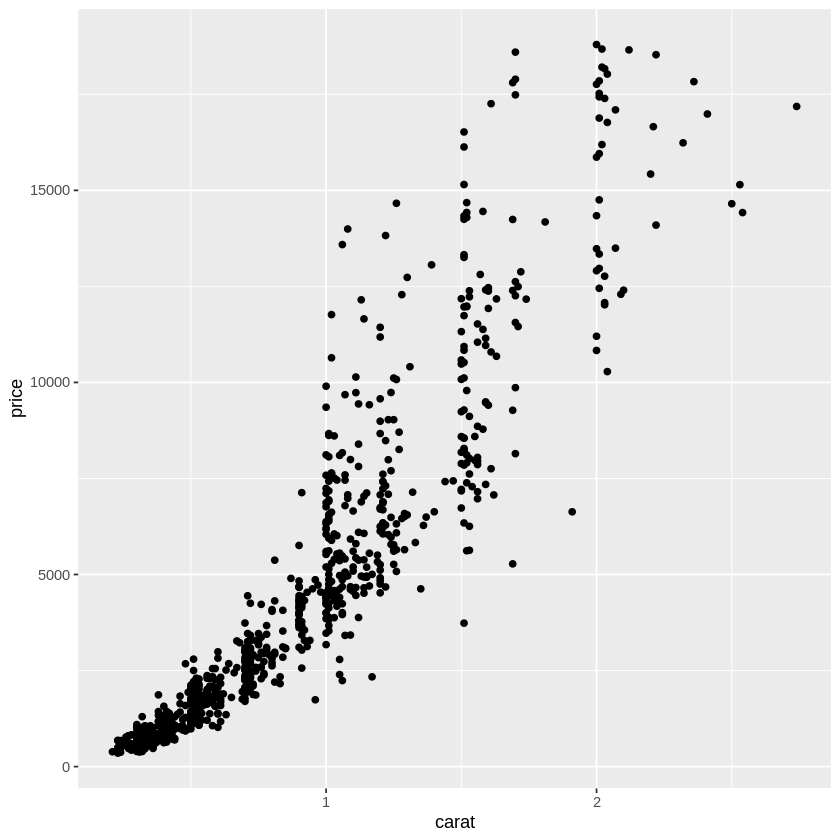

In [ ]:
# Scatter plots
p <- ggplot(dsmall, aes(x = carat, y = price))
p + geom_point()

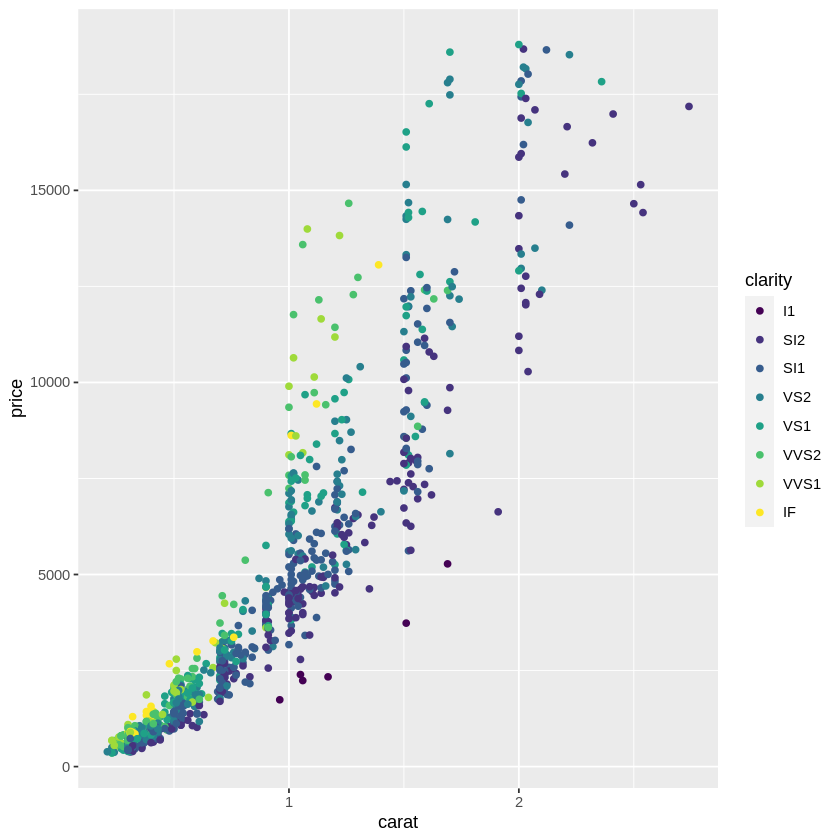

In [ ]:
# color by diamonds clarity
ggplot(dsmall, aes(x = carat, y = price)) +
geom_point(aes(color = clarity))

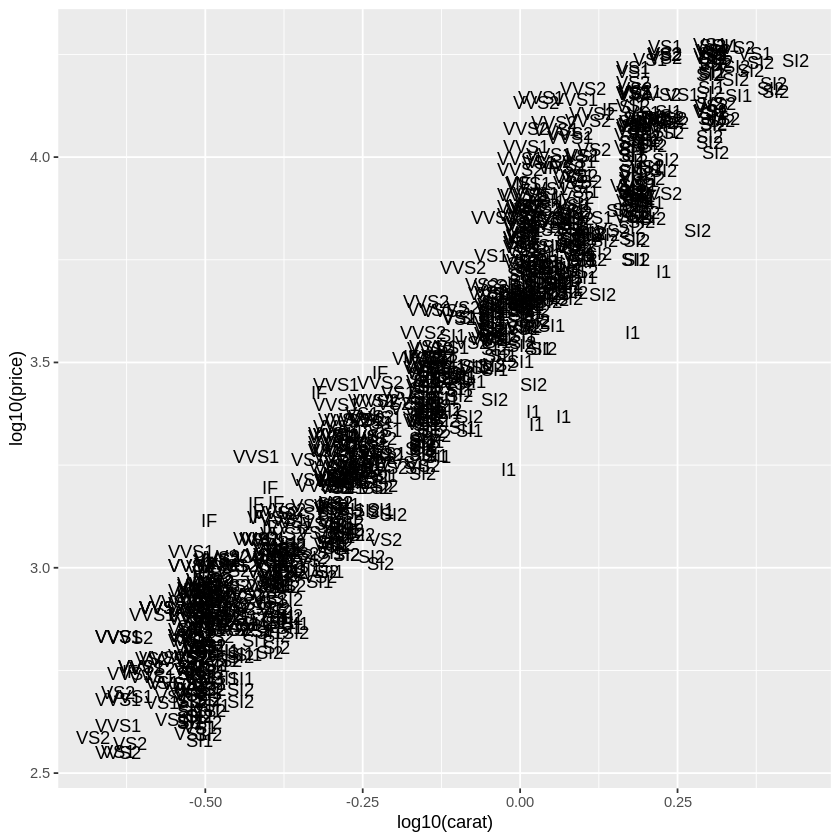

In [ ]:
# replace the point by text label
plog <- ggplot(
dsmall,
aes(x = log10(carat), y = log10(price)))
plog + geom_text(aes(label = clarity))

You can also change the size of the point or the shape of the point etc.

You can also scale the axies.

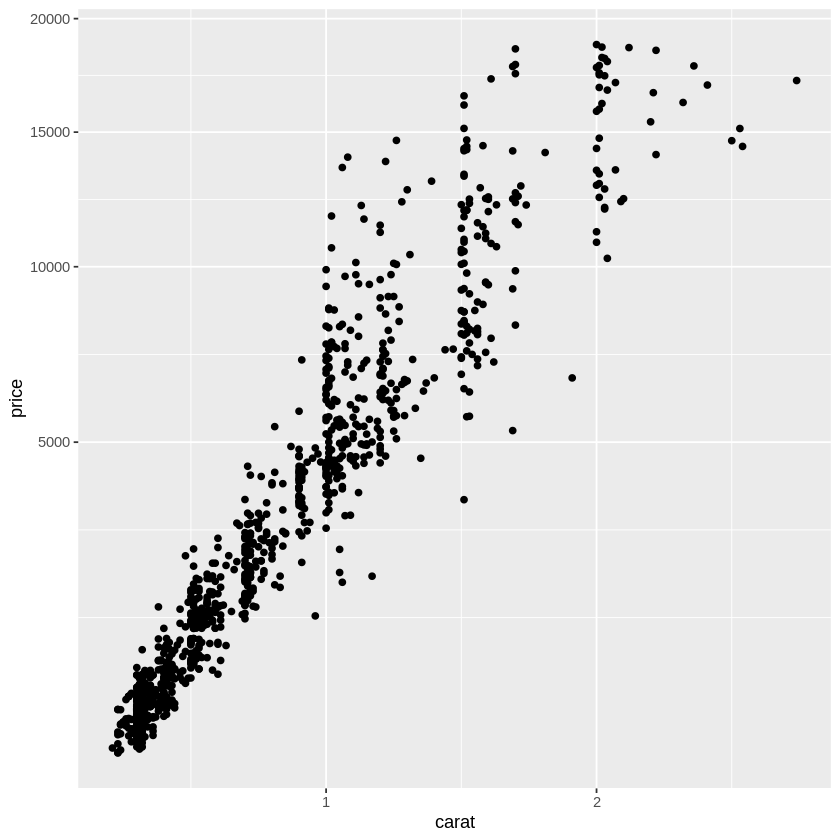

In [ ]:
# Square root y-axis transformation
p1 <- ggplot(dsmall, aes(x = carat, y = price))
psqrt <- p1 + geom_point() + scale_y_sqrt()
psqrt

After creating your basic graph, what if you want to add a title, adjust the size of text?

In [ ]:
data_crime = read.table("/content/city_crime.txt", header = TRUE)
#crime_plot <- ggplot(data = data_crime) + geom_point(aes(x = Robbery, y = Assault, color = Murder))
#crime_plot <- crime_plot + labs(title = "Crime", x = 'Robbery', y = 'Assualt') 
#crime_plot

In [ ]:
#crime_plot + theme(text = element_text(size=20))
# just change size of title
#crime_plot + theme(plot.title = element_text(size = 20))

In [ ]:
# annotate our graph
#crime_plot + geom_abline(intercept = 1500, slope = -0.5) + 
  #geom_text(aes(x = c(1500), y = c(800), label = c('separating hyperplane')), size = 5)

Pairs plots are useful to visualize multiple variables at the same time. The base function is `pairs`, but if you are using ggplot package instead you can use `ggpairs`.

#### 3D plots

Sometimes it is useful to create 3D plots to visualize multivariate data. The library **plotly** can do so.

`
library(plotly)
p = plot_ly(data_crime, x = ~Robbery, y = ~Assault, z = ~Murder,color=~Larceny)
p
`

## Data Manipulation

### **What is tidying data**

There are three interrelated rules which make a dataset tidy:

*   Each variable must have its own column.
*   Each observation must have its own row.
*   Each value must have its own cell.

Tidy data works well with R because R is a vectorized programming language. Data structures in R are built from vectors and R’s operations are optimized to work with vectors. Tidy data takes advantage of both of these traits.



### Reshaping a dataset

There are two formats that a dataset can be presented: long and wide. The functions `pivot_wider` and `pivot_longer` can modify from one format to another.

In [ ]:
head(us_rent_income, 15)

GEOID,NAME,variable,estimate,moe
<chr>,<chr>,<chr>,<dbl>,<dbl>
01,Alabama,income,24476,136
01,Alabama,rent,747,3
02,Alaska,income,32940,508
02,Alaska,rent,1200,13
04,Arizona,income,27517,148
04,Arizona,rent,972,4
05,Arkansas,income,23789,165
05,Arkansas,rent,709,5
06,California,income,29454,109


In [ ]:
us_rent_income %>%
  pivot_wider(names_from = variable, values_from = c(estimate, moe))

GEOID,NAME,estimate_income,estimate_rent,moe_income,moe_rent
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
01,Alabama,24476,747,136,3
02,Alaska,32940,1200,508,13
04,Arizona,27517,972,148,4
05,Arkansas,23789,709,165,5
06,California,29454,1358,109,3
08,Colorado,32401,1125,109,5
09,Connecticut,35326,1123,195,5
10,Delaware,31560,1076,247,10
11,District of Columbia,43198,1424,681,17


ggplot easily allows to visualize multiple time series in the same plot. For this, it is necessary to convert the data first to a long format using `pivot_longer`.

In [ ]:
trigon_data = data.frame(lapply(c(sin, cos), function(f) f(seq(0, 2*pi,0.05))), x= seq(0, 2*pi,0.05))
colnames(trigon_data) = c("sin", "cos", "x")
trigon_data_long = pivot_longer(trigon_data, c(1,2),names_to = "variable", values_to = "value")
trigon_data_long

x,variable,value
<dbl>,<chr>,<dbl>
0.00,sin,0.00000000
0.00,cos,1.00000000
0.05,sin,0.04997917
0.05,cos,0.99875026
0.10,sin,0.09983342
0.10,cos,0.99500417
0.15,sin,0.14943813
0.15,cos,0.98877108
0.20,sin,0.19866933


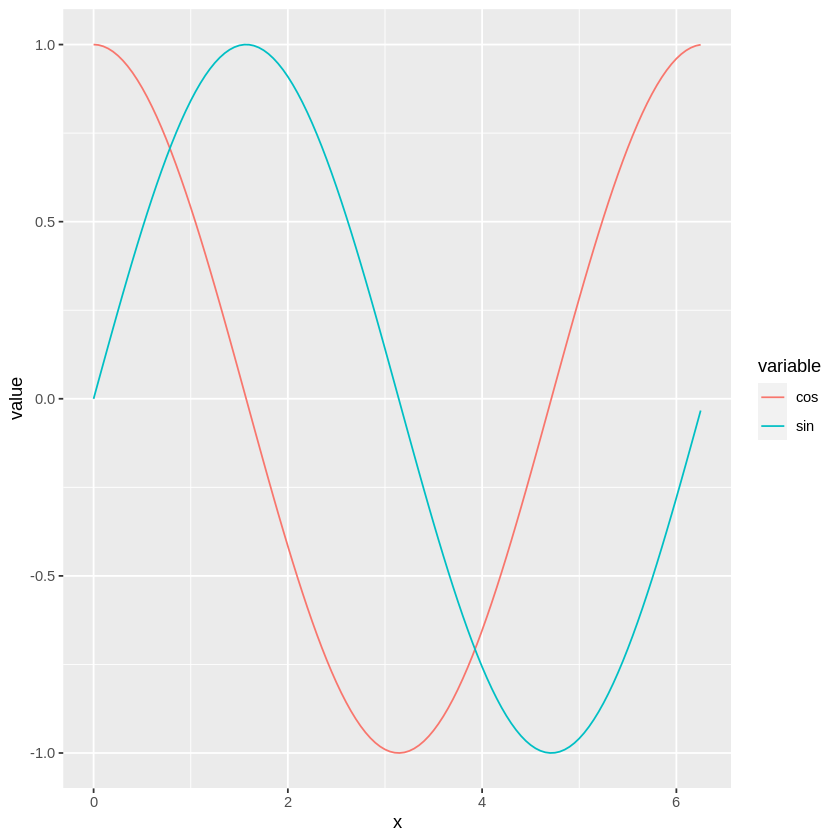

In [ ]:
ggplot(trigon_data_long, aes(x=x, y=value,colour=variable, group = variable)) + geom_line()

### **dplyr** package

**dplyr** is a powerful package for quick data manipulation. It transforms and summarizes tabular data with rows and columns. "dplyr" is the next iteration of "plyr" and save more time than "plyr". Here is an example comparing the speed: https://blog.rstudio.com/2014/01/17/introducing-dplyr/.

Here are some important functions to remember:
1. `select()`: select columns

In [ ]:
# dplyr is also contained in tidyverse library
head(select(iris,Sepal.Length,Sepal.Width),3)
# to select all the columns except a specific column, use the subtraction operator
head(select(iris,-Species),3)
# select all columns that start with the character string "Sepal"
head(select(iris,starts_with("Sepal")),3)

,Sepal.Length,Sepal.Width
,<dbl>,<dbl>
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2


,Sepal.Length,Sepal.Width
,<dbl>,<dbl>
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2


Some additional options: `ends_with()`=end with a character string, `contains()`=contain a character string, `matches()`=match a regular expression, `one_of()`=from a group of column names.

2. `filter()`: filter rows

In [ ]:
head(filter(iris,Species=="setosa"),3)
filter(iris,Species=="setosa",Sepal.Length>5.5)
filter(iris,Species=="setosa",Sepal.Length>5.5,Sepal.Width<4)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.8,4.0,1.2,0.2,setosa
5.7,4.4,1.5,0.4,setosa
5.7,3.8,1.7,0.3,setosa


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.7,3.8,1.7,0.3,setosa


3. Pipe operator: `%>%`
"dplyr" has the ability to chain operations together from left to right with the %>% operator. This operator is used to pipe the outbput from one function to the input of another function.

In [ ]:
iris %>%
  select(Sepal.Length) %>%
  head(3)

,Sepal.Length
,<dbl>
1,5.1
2,4.9
3,4.7


4. `arrange()`: re-order the rows by a particular column

In [ ]:
# order from small to large
iris %>% arrange(Sepal.Length) %>% head(3)
iris %>% arrange(Species,Sepal.Length) %>% head(3)
# View(iris %>% arrange(Species,Sepal.Length))
iris %>% arrange(Species,Sepal.Length) %>% filter(Sepal.Width>=3.6) %>% tail

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,4.3,3.0,1.1,0.1,setosa
2,4.4,2.9,1.4,0.2,setosa
3,4.4,3.0,1.3,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,4.3,3.0,1.1,0.1,setosa
2,4.4,2.9,1.4,0.2,setosa
3,4.4,3.0,1.3,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
14,5.7,4.4,1.5,0.4,setosa
15,5.7,3.8,1.7,0.3,setosa
16,5.8,4.0,1.2,0.2,setosa
17,7.2,3.6,6.1,2.5,virginica
18,7.7,3.8,6.7,2.2,virginica
19,7.9,3.8,6.4,2.0,virginica


5. `mutate()`: add new columns

iris %>% mutate(sl_mean= mean(Sepal.Length)) %>% head(3)
iris %>% mutate(sl_mean= mean(Sepal.Length),sl_sd=sd(Sepal.Length)) %>% 
     head(3)

6. `summarise()`: summary statistics for a given column.

In [ ]:
iris%>% summarise(sl_mean = mean(Sepal.Length))
iris %>% summarise(sl_min = min(Sepal.Length),
                  sl_med = median(Sepal.Length),
                  total = n(),
                  sl_first = first(Sepal.Length),
                  sl_dist = n_distinct(Sepal.Length))
# n() returns the length of vector

sl_mean
<dbl>
5.843333


sl_min,sl_med,total,sl_first,sl_dist
<dbl>,<dbl>,<int>,<dbl>,<int>
4.3,5.8,150,5.1,35


7. `group_by()`: it's related to concept of "split-apply-combine".

In [ ]:
iris %>% group_by(Species) %>% 
  summarise(sl_min = min(Sepal.Length),
                  sl_med = median(Sepal.Length),
                  total = n(),
                  sl_first = first(Sepal.Length),
                  sl_dist = n_distinct(Sepal.Length))
# maintain the original variables
temp <- iris %>% group_by(Species) %>%
  mutate(sl_mean = mean(Sepal.Length))
head(temp,3)
tail(temp,3)

`summarise()` ungrouping output (override with `.groups` argument)



Species,sl_min,sl_med,total,sl_first,sl_dist
<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>
setosa,4.3,5.0,50,5.1,15
versicolor,4.9,5.9,50,7.0,21
virginica,4.9,6.5,50,6.3,21


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,sl_mean
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
5.1,3.5,1.4,0.2,setosa,5.006
4.9,3.0,1.4,0.2,setosa,5.006
4.7,3.2,1.3,0.2,setosa,5.006


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,sl_mean
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
6.5,3.0,5.2,2.0,virginica,6.588
6.2,3.4,5.4,2.3,virginica,6.588
5.9,3.0,5.1,1.8,virginica,6.588


For more graph tutorials in R, http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html

For more dplyr in R,
http://genomicsclass.github.io/book/pages/dplyr_tutorial.html